# EDA

## Imports

In [1]:
# General imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from pathlib import Path

raw_data_folder = Path("../data/raw")
processed_data_folder = Path("../data/processed") 
submission_folder = Path("../submissions")
figures_folder = Path("../reports/figures")

## Read data

In [6]:
sample_submission = pd.read_csv(raw_data_folder / "sample_submission.csv")
train = pd.read_csv(raw_data_folder / "train.csv")
test = pd.read_csv(raw_data_folder / "test.csv")

In [7]:
sample_submission.head()

,id,Tm
0,1022,0
1,1146,0
2,79,0
3,2279,0
4,1342,0


In [8]:
train.head()

,id,SMILES,Tm,Group 1,Group 2,Group 3,Group 4,Group 5,Group 6,Group 7,...,Group 415,Group 416,Group 417,Group 418,Group 419,Group 420,Group 421,Group 422,Group 423,Group 424
0,2175,FC1=C(F)C(F)(F)C1(F)F,213.15,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1222,c1ccc2c(c1)ccc3Nc4ccccc4c23,407.15,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2994,CCN1C(C)=Nc2ccccc12,324.15,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1704,CC#CC(=O)O,351.15,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2526,CCCCC(S)C,126.15,2,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
train.shape, test.shape

((2662, 427), (666, 426))

# Exploration

## Target distribution

Mean Tm: 278.26, Standard Deviation Tm: 85.12


Text(0.5, 1.0, 'Distribution of Melting Temperature (Tm)')

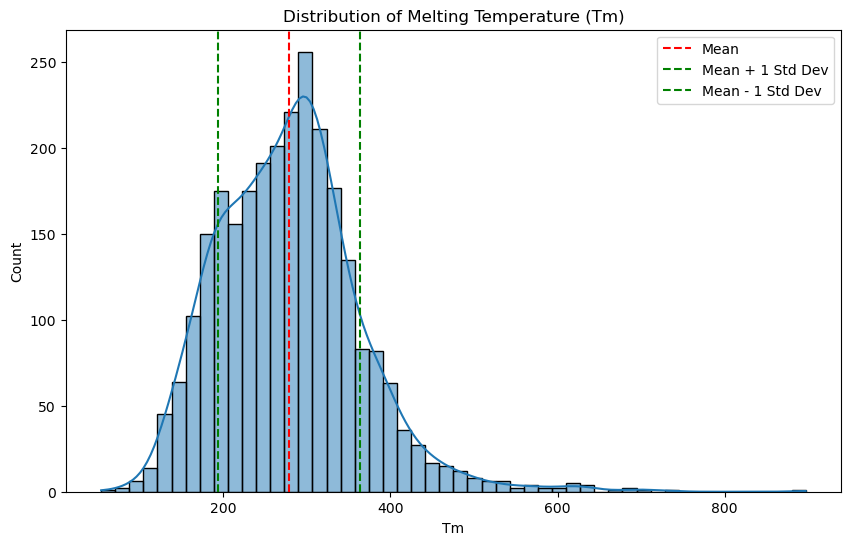

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(train['Tm'], bins=50, kde=True)

# Mean and standard deviation
mean_Tm = train['Tm'].mean()
std_Tm = train['Tm'].std()
print(f"Mean Tm: {mean_Tm:.2f}, Standard Deviation Tm: {std_Tm:.2f}")

plt.axvline(mean_Tm, color='r', linestyle='--', label='Mean')
plt.axvline(mean_Tm + std_Tm, color='g', linestyle='--', label='Mean + 1 Std Dev')
plt.axvline(mean_Tm - std_Tm, color='g', linestyle='--', label='Mean - 1 Std Dev')
plt.legend()
plt.title('Distribution of Melting Temperature (Tm)')

## Features distribution

There are a lot of features. Those are (mostly) group descriptors, most of the molecules do not have anything close to 426 functional groups so there are A LOT of zeros. Let's quantify this.

In [13]:
X = train.drop(columns=['id', 'Tm', 'SMILES'])
X_ids = train['id']
X_SMILES = train['SMILES']
y = train['Tm']

In [26]:
X_T = X.T 
X_T['Group Sum'] = X_T.sum(axis=1)
X_T['Mean'] = X_T.mean(axis=1)
X_T['Std Dev'] = X_T.std(axis=1)
X_T_non_zero = X_T[X_T['Group Sum'] > 0]
print(f"Number of features with at least one non-zero entry: {X_T_non_zero.shape[0]} out of {X_T.shape[0]} total features.")


X_T_sorted = X_T.sort_values(by='Group Sum', ascending=False)
X_T

Number of features with at least one non-zero entry: 337 out of 424 total features.


,0,1,2,3,4,5,6,7,8,9,...,2655,2656,2657,2658,2659,2660,2661,Group Sum,Mean,Std Dev
Group 1,0,0,2,1,2,3,1,2,0,0,...,0,0,0,0,0,1,2,2717,2.040556,52.638422
Group 2,0,0,1,0,3,0,18,4,0,0,...,0,0,1,0,0,1,0,4212,3.163350,81.660733
Group 3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,306,0.229816,5.941679
Group 4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,97,0.072850,1.890136
Group 5,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,98,0.073601,1.909084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Group 420,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.000000,0.000000
Group 421,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.000000,0.000000
Group 422,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.000000,0.000000
Group 423,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.000000,0.000000


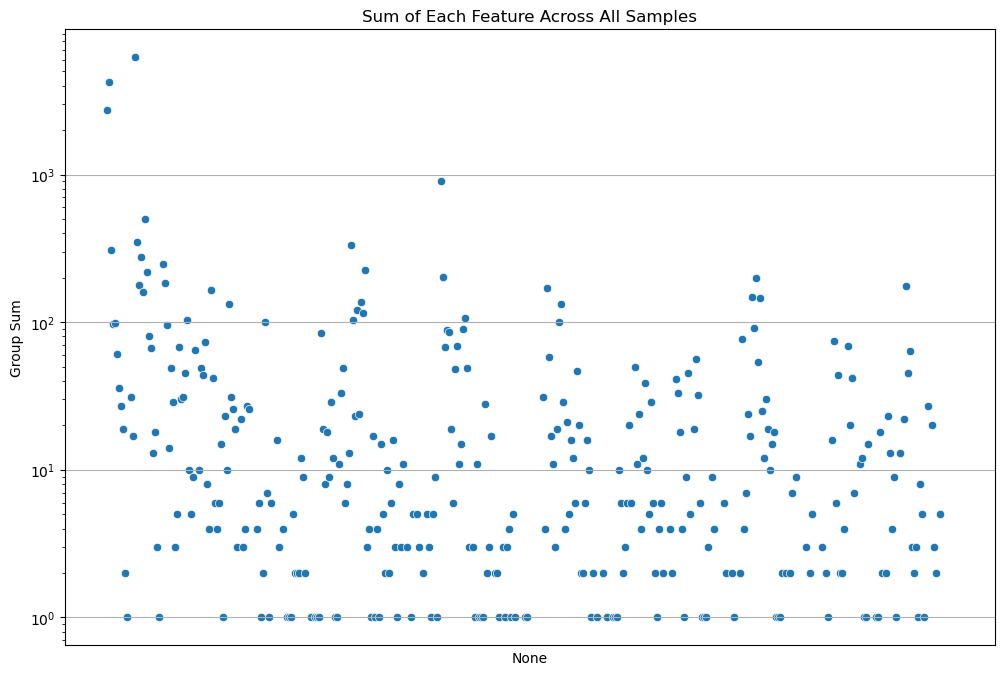

In [29]:
plt.figure(figsize=(12, 8))
plt.title('Sum of Each Feature Across All Samples')
plt.grid()
sns.scatterplot(data=X_T, x=X_T.index, y='Group Sum')
plt.xticks([])
plt.yscale('log')  # Log scale for better visualization

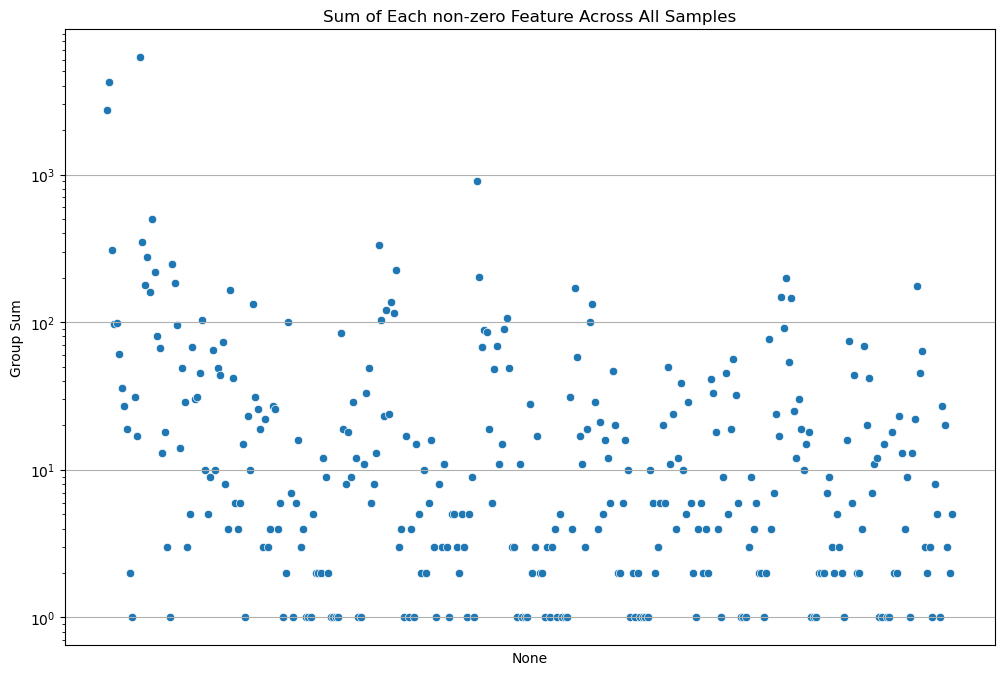

In [28]:
plt.figure(figsize=(12, 8))
plt.title('Sum of Each non-zero Feature Across All Samples')

plt.grid()
sns.scatterplot(data=X_T_non_zero, x=X_T_non_zero.index, y='Group Sum')
plt.xticks([])
plt.yscale('log')  # Log scale for better visualization
